# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns  # For advanced data visualization
import matplotlib.pyplot as plt  # For basic plotting and visualizations

import string  # For string operations and handling
from nltk.corpus import stopwords  # For removing common stopwords in text analysis
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df=pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')

`encoding='ISO-8859-1'` specifies the character encoding used to read the CSV file. `ISO-8859-1`, also known as Latin-1, is an encoding standard for Western European languages that includes characters for languages like English, French, and German. It ensures that text data is interpreted correctly when reading the file.

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df.duplicated().sum()

403

# Data Cleaning

Removing columns 'Unnamed: 2', 'Unnamed: 3', and 'Unnamed: 4' due to their minimal non-null entries (50, 12, and 6 respectively),as they contribute little useful data to the analysis.

403 duplicate values are being removed, keeping the first occurrence.


In [9]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [11]:
df.sample(5)

,v1,v2
1067,ham,Meeting u is my work. . . Tel me when shall i ...
2184,ham,I know a few people I can hit up and fuck to t...
2434,ham,Uncle boye. I need movies oh. Guide me. Plus y...
4575,spam,Congratulations ur awarded 500 of CD vouchers ...
2767,ham,Wow v v impressed. Have funs shopping!


In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5169, 2)

# Renaming

In [14]:
df=df.rename(columns={'v1':'TARGET','v2':'MESSAGE'})

In [15]:
df.head()

,TARGET,MESSAGE
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# "ham" (legitimate messages) (0) and "spam" (unsolicited or promotional messages) (1)

# Encoding Categorical Target Variable Using LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['TARGET']=encoder.fit_transform(df['TARGET'])
df.head()

,TARGET,MESSAGE
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Visualizing Distribution of Target Categories with Pie Chart

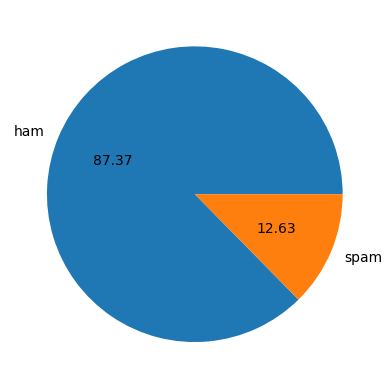

In [18]:
plt.pie(df["TARGET"].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

# Lowercasing & Removing StopWords

In [19]:
df['MESSAGE'][5].lower()

"freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, å£1.50 to rcv"

In [20]:
df["MESSAGE"] = df["MESSAGE"].str.lower()

In [21]:
def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)

    x = new_text[:]  # Create a copy of new_text
    new_text.clear()  # Clear the original new_text list
    return " ".join(x)  # Join the copied list x into a single string separated by spaces and return it

In [22]:
df["MESSAGE"] = df["MESSAGE"].apply(remove_stopwords)

In [23]:
df['MESSAGE'][5]

"freemsg hey  darling   3 week's    word back! i'd like  fun     still? tb ok! xxx std chgs  send, å£1.50  rcv"

# Vectorizing Text Data Using CountVectorizer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(df['MESSAGE'])
y = df['TARGET']

# Splitting Data into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [26]:
print(X_train.shape)
print(y_train.shape)

(4135, 8650)
(4135,)


In [27]:
X_test.shape

(1034, 8650)

# Model Training

In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

97.678916827853


[[892   2]
 [ 22 118]]


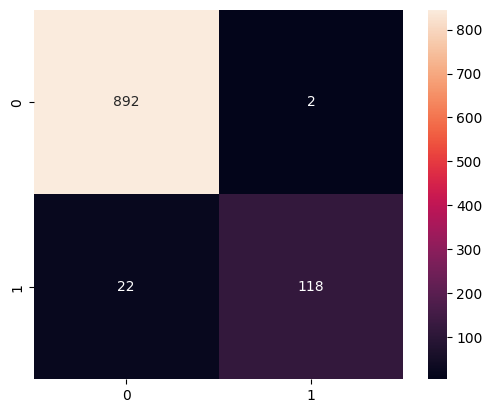

In [29]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

sns.heatmap(conf_mat, square = True, annot = True, robust = True, fmt='g')
plt.show()

- **True Negatives (TN)**: 892 instances were correctly classified as negative (`ham`).
- **False Positives (FP)**: 2 instances were incorrectly classified as positive (`spam`) when they were actually negative (`ham`).
- **False Negatives (FN)**: 22 instances were incorrectly classified as negative (`ham`) when they were actually positive (`spam`).
- **True Positives (TP)**: 118 instances were correctly classified as positive (`spam`).

In [30]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train.toarray(), y_train)
y_pred = gb.predict(X_test.toarray())
print(accuracy_score(y_test, y_pred)*100)

90.32882011605416


In [31]:
# Create a DataFrame with the true labels and predicted labels
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(comparison_df.head())

      Actual  Predicted
4994       0          0
4292       0          0
4128       0          0
4429       0          0
660        0          0


In [32]:
misclassified_df = comparison_df[comparison_df['Actual'] != comparison_df['Predicted']]

In [33]:
misclassified_df.head()

,Actual,Predicted
2965,0,1
1714,0,1
3709,0,1
3250,0,1
3300,1,0


In [34]:
# Total number of misclassified instances
misclassified_df.shape

(100, 2)